In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/email-spam-detection-dataset-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/email-spam-detection-dataset-classification


In [2]:
df = pd.read_csv(path + "/spam.csv", encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1881,ham,Ok.. ÌÏ finishing soon?,NaN,NaN,NaN
3186,ham,Howz that persons story,NaN,NaN,NaN
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...,NaN,NaN,NaN
1822,ham,If you're thinking of lifting me one then no.,NaN,NaN,NaN
1904,ham,Wah... Okie okie... Muz make use of e unlimite...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
df.sample(2)

,v1,v2
4519,ham,What to think no one saying clearly. Ok leave ...
763,ham,Nothing but we jus tot u would ask cos u ba gu...


In [7]:
df = df.rename(columns={'v1': 'spam-ham', 'v2': 'mail-text'})

In [8]:
df.head()

,spam-ham,mail-text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

,0
spam-ham,0
mail-text,0


In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df= df.drop_duplicates(keep='first')

In [12]:
df.head()

,spam-ham,mail-text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['spam-ham'] = encoder.fit_transform(df['spam-ham'])

<ipython-input-13-85dd85700d22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spam-ham'] = encoder.fit_transform(df['spam-ham'])


In [14]:
  df.sample()

,spam-ham,mail-text
4269,0,Great. Hope you are using your connections fro...


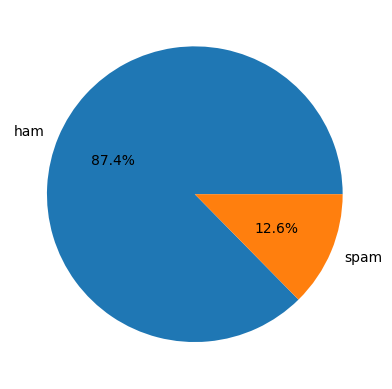

In [15]:

plt.pie(df['spam-ham'].value_counts(), labels=['ham', 'spam'], autopct='%.01f%%')
plt.show()

From Pie Chart we see that data is imbalanced. Means Ham is more and spam is very few.

In [16]:
pip install Nltk

In [17]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
df['character_count'] = df['mail-text'].apply(len)

In [19]:
df['word_count'] = df['mail-text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['sentence_count'] = df['mail-text'].apply(lambda x: len(sent_tokenize(x)))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   spam-ham         5169 non-null   int64 
 1   mail-text        5169 non-null   object
 2   character_count  5169 non-null   int64 
 3   word_count       5169 non-null   int64 
 4   sentence_count   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [22]:
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['spam-ham']==0][['character_count','word_count','sentence_count']].describe() # for ham

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['spam-ham']==1][['character_count','word_count','sentence_count']].describe() # for Spam

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='character_count', ylabel='Count'>

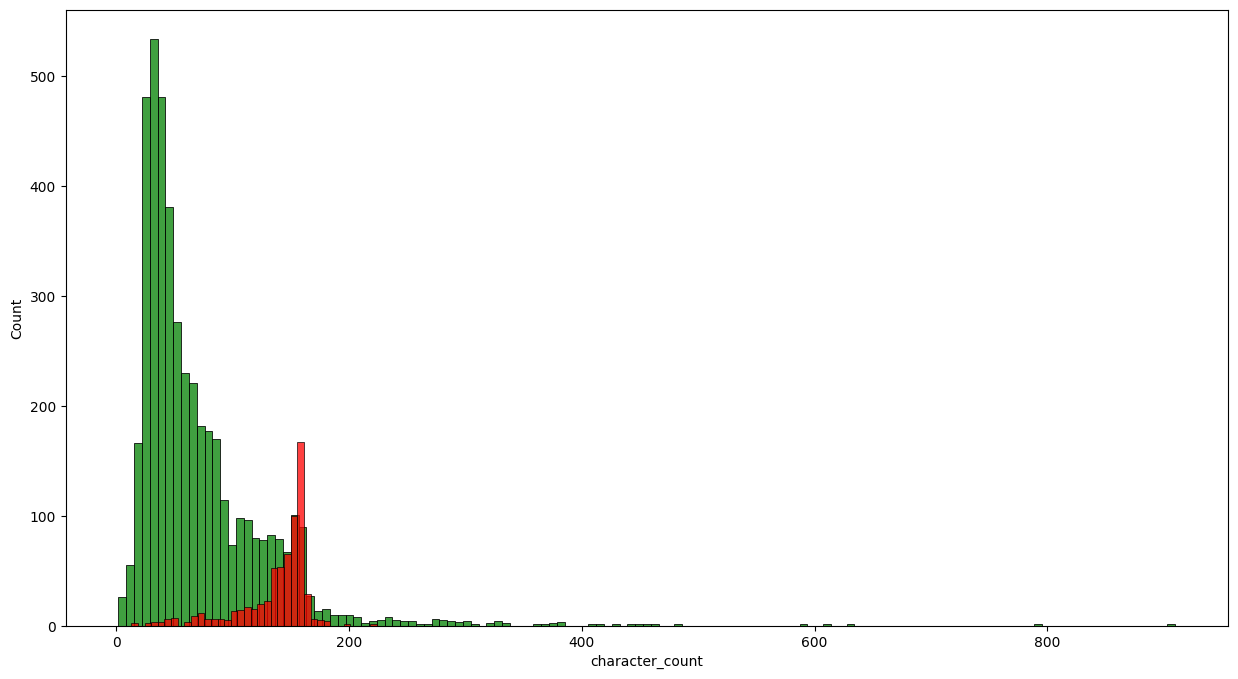

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['spam-ham']==0]['character_count'],color='green')
sns.histplot(df[df['spam-ham']==1]['character_count'],color='red')

Spam has high character count while ham has low character count.

<Axes: >

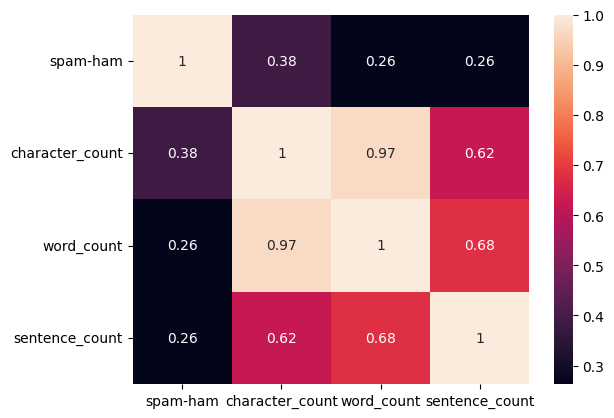

In [26]:
sns.heatmap(df[['spam-ham','character_count','word_count','sentence_count']].corr(),annot=True)


In [27]:
df[['spam-ham','character_count','word_count','sentence_count']].corr()

,spam-ham,character_count,word_count,sentence_count
spam-ham,1.000000,0.384717,0.262912,0.263939
character_count,0.384717,1.000000,0.965760,0.624139
word_count,0.262912,0.965760,1.000000,0.679971
sentence_count,0.263939,0.624139,0.679971,1.000000


In [28]:
ps = PorterStemmer()

In [29]:
#this code for first time import stop word library and punctuations.
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def text_process(text):
  text = text.lower()     # lowercase all word
  text = nltk.word_tokenize(text) # tokenize/listing all word
  y =[]
  for i in text:  # remove special characters
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:      # remove stop words and punctuations
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:      # stemming
    y.append(ps.stem(i))
  return " ".join(y)

In [31]:
#testing function
text_process('hi how are you, Rahul')

'hi rahul'

In [32]:
df['process-text']=df['mail-text'].apply(text_process)

In [33]:
df.drop(columns=['mail-text'])

,spam-ham,character_count,word_count,sentence_count,process-text
0,0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,29,8,2,ok lar joke wif u oni
2,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13,1,u dun say earli hor u c alreadi say
4,0,61,15,1,nah think goe usf live around though
...,...,...,...,...,...
5567,1,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,37,9,1,b go esplanad fr home
5569,0,57,15,2,piti mood suggest
5570,0,125,27,1,guy bitch act like interest buy someth els nex...


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

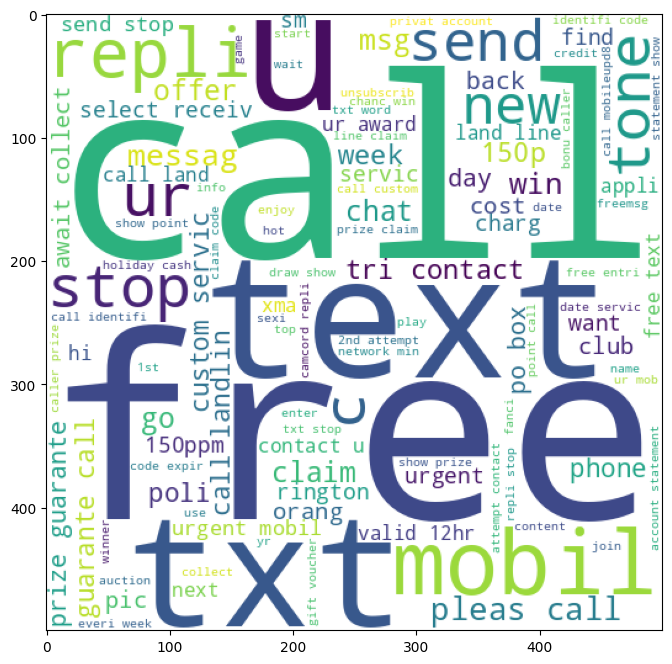

In [35]:

spam_text = ' '.join(df[df['spam-ham']==1]['process-text'])
plt.figure(figsize=(15,8))
plt.imshow(wc.generate(spam_text))

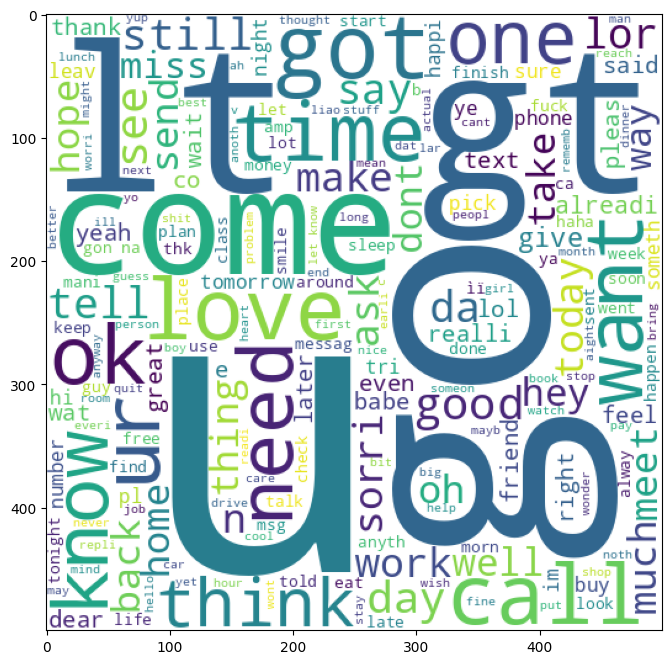

In [36]:
ham_text = ' '.join(df[df['spam-ham']==0]['process-text'])
plt.figure(figsize=(15,8))
plt.imshow(wc.generate(ham_text))

**Data Modelling**

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=8000, ngram_range=(1,2)) # with limited characters which uses maximum time

In [38]:
x= cv.fit_transform(df['process-text']).toarray()
y = df['spam-ham'].values

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [63]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

Try with CountVectorizer

In [66]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


Here precision is very low so this model can't be use.

In [42]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


Here Precision is increase but it should be as high as possible.

In [43]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


We Found both Accuracy and precision higher than above two.

Try with TF-IDF Vecorizer

In [104]:
x1= tfidf.fit_transform(df['process-text']).toarray()
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y,test_size=0.25,random_state=2)

In [45]:
gnb = GaussianNB()
gnb.fit(x1_train,y1_train)
y1_pred = gnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred))
print(confusion_matrix(y1_test,y1_pred))
print(precision_score(y1_test,y1_pred))

0.868522815158546
[[990 140]
 [ 30 133]]
0.48717948717948717


In [46]:
mnb = MultinomialNB()
mnb.fit(x1_train,y1_train)
y1_pred = mnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred))
print(confusion_matrix(y1_test,y1_pred))
print(precision_score(y1_test,y1_pred))

0.9737045630317092
[[1130    0]
 [  34  129]]
1.0


0 figure at False Positive in confusion Matrix which is good for Spam detection.

In [47]:
bnb = BernoulliNB()
bnb.fit(x1_train,y1_train)
y1_pred = bnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred))
print(confusion_matrix(y1_test,y1_pred))
print(precision_score(y1_test,y1_pred))

0.982985305491106
[[1128    2]
 [  20  143]]
0.9862068965517241


Using tfidf we get 100% precision using mnb so this we prefer** TDIDF** Vectorizer with **MNB** transformation method. although bnb has both (accuracy and precision) good but in spam detection precision matters.

Let's Check other ML algorithm with MNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
lr = LogisticRegression(max_iter=1000)
svc = SVC(kernel='sigmoid', gamma=1.0)
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=40, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [97]:
clf = {
    'LR': lr,
     'SVC': svc,
     'DT': dt,
     'KNN': knn,
     'RF': rf,
    'MNB': mnb,
     'ABC': abc,
     'BC': bc,
     'ETC': etc,
     'GBDT': gbdt,
     'XGB': xgb
    }         # As multiple algorithms, we need to test. Make dictionary to perform each algorithm using loop method.

In [110]:
def train_classifier(clf, x1_train, y1_train, x1_test, y1_test): # Make function to train data for each classifier
  clf.fit(x1_train, y1_train)
  y1_pred = clf.predict(x1_test)
  accuracy = accuracy_score(y1_test, y1_pred)

  precision = precision_score(y1_test, y1_pred)
  return accuracy, precision

In [111]:
precision_scores = []
accuracy_scores = []
for name, classifier in clf.items():
  c_acc, c_pre = train_classifier(classifier,x1_train, y1_train, x1_test, y1_test)
  print("For", name)
  print("Accuracy - ", c_acc)
  print("Precision - ", c_pre)
  accuracy_scores.append(c_acc)
  precision_scores.append(c_pre)


For LR
Accuracy -  0.9474091260634184
Precision -  1.0
For SVC
Accuracy -  0.9752513534416086
Precision -  0.9781021897810219
For DT
Accuracy -  0.9296210363495746
Precision -  0.8673469387755102
For KNN
Accuracy -  0.8979118329466357
Precision -  1.0
For RF
Accuracy -  0.97138437741686
Precision -  0.9921875
For MNB
Accuracy -  0.9667440061871616
Precision -  1.0
For ABC
Accuracy -  0.9234338747099768
Precision -  0.872093023255814
For BC
Accuracy -  0.9597834493426141
Precision -  0.8881118881118881
For ETC
Accuracy -  0.979891724671307
Precision -  0.9928057553956835
For GBDT
Accuracy -  0.9520494972931168
Precision -  0.9243697478991597
For XGB
Accuracy -  0.962877030162413
Precision -  0.9457364341085271


In [113]:
performance_all = pd.DataFrame({'Algorithm': clf.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by=['Precision'], ascending=False)

In [114]:
performance_all

,Algorithm,Accuracy,Precision
0,LR,0.947409,1.000000
5,MNB,0.966744,1.000000
3,KNN,0.897912,1.000000
8,ETC,0.979892,0.992806
4,RF,0.971384,0.992188
1,SVC,0.975251,0.978102
10,XGB,0.962877,0.945736
9,GBDT,0.952049,0.924370
7,BC,0.959783,0.888112
6,ABC,0.923434,0.872093


***TF-IDF + MNB has 100% precision and high accuracy so let's go for it.

***
** We can also use 'scaling' but here this gives good result so no need to integrate in this model. or use 'Voting classifier'/stacking.*
But we can add 'num_character' column in this data.

In [116]:
 # x1 = np.hstack((x1, df['character_count'].values.reshape(-1,1)))
 ## i can add last numeric column but is not give improvement.

In [118]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))